In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("All_Pokemon.csv")
df

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,Glastrier,Ice,NaN,['Chilling Neigh'],100,145,130,65,110,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3
1028,897,Spectrier,Ghost,NaN,['Grim Neigh'],100,65,60,145,80,...,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5


In [3]:
data = df[["Att", "Def"]]
data

,Att,Def
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43
...,...,...
1027,145,130
1028,65,60
1029,80,80
1030,165,150


In [4]:
class DBscan:
    
    def __init__(self, epsilon=1.0, minPts=5, metric='euclidean'):
        self.epsilon = epsilon
        self.minPts = minPts
        self.metric = metric

    def fit(self, data):
        self.labels = np.zeros(len(data), dtype=int) - 1  
        self.clusters = []  
        cid = 0  
        for i in range(len(data)):
            if self.labels[i] == -1:  # if not viewed
                neighbors = self.get_neighbors(data, i)
                if len(neighbors) < self.minPts:         #if  not core
                    self.labels[i] = 0                   # noise
                else:                                    #if core
                    cid += 1
                    self.clusters.append([i])
                    self.labels[i] = cid
                    for j in neighbors:
                        if self.labels[j] == -1: 
                            self.labels[j] = cid
                            self.clusters[cid-1].append(j)
                            neighbors2 = self.get_neighbors(data, j)
                            if len(neighbors2) >= self.minPts:
                                neighbors += list(set(neighbors2) - set(neighbors))  # remove duplicates and add new neighbors
                        elif self.labels[j] == 0:  # if neighbor is noise
                            self.labels[j] = cid
                            self.clusters[cid-1].append(j)
        return self.clusters
    
    def get_neighbors(self, data, i):
        neighbors = set()
        for j in range(len(data)):
            if self.distance(data[i], data[j]) <= self.epsilon:
                neighbors.add(j)
        return list(neighbors)
    
    def distance(self, p1, p2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((p1-p2)**2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(p1-p2))
        elif self.metric == 'cosine':
            return 1 - np.dot(p1, p2) / (np.sqrt(np.sum(p1**2)) * np.sqrt(np.sum(p2**2)))
        else:
            raise Exception('Invalid metric')
        
    def plot(self, data):
        noise_idx = np.where(self.labels == 0)[0]
        cluster_idxs = [np.array(c) for c in self.clusters]
        colors = cm.rainbow(np.linspace(0, 1, len(self.clusters) + 1))
        for i, cluster_idxs in enumerate(cluster_idxs):
            plt.scatter(data[cluster_idxs, 0], data[cluster_idxs, 1], color=colors[i], s=10)
        if len(noise_idx) > 0:
            plt.scatter(data[noise_idx, 0], data[noise_idx, 1], color='black', s=10)
        plt.show()

In [5]:
scaler = StandardScaler()
data = scaler.fit_transform(data[['Att','Def']])           # we will just need x and y columns

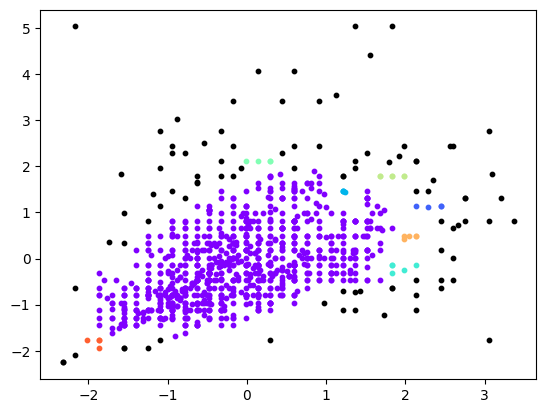

In [9]:
db = DBscan(0.2, 4)
db.fit(data)
db.plot(data)

SICKIT-LEARN

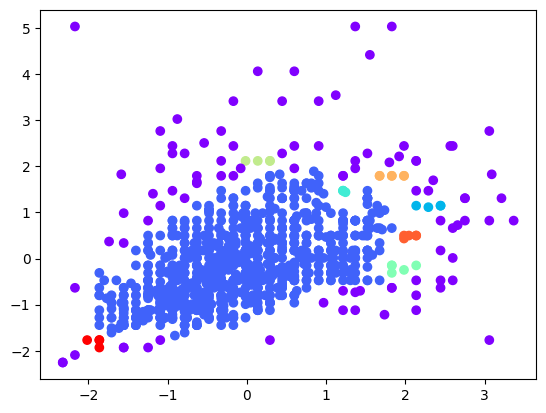

In [10]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=4)
db.fit(data)
labels = db.labels_


# ploting the clusters 

plt.scatter(data[:,0], data[:,1], c=labels, cmap='rainbow')
plt.show()

C:\Users\colom\AppData\Local\Temp\ipykernel_12724\3676249382.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 10)


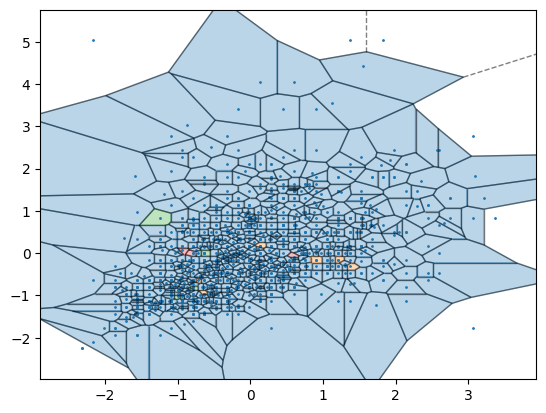

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d


vor = Voronoi(data)
cmap = plt.cm.get_cmap('tab10', 10)


voronoi_plot_2d(vor, show_vertices=False, line_colors='black',
                line_width=1, line_alpha=0.5, point_size=2)


for region, label in zip(vor.regions, db.labels_):
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        color = cmap(label)
        plt.fill(*zip(*polygon), c=color, alpha=0.3)
